In [1]:
#install tensorflow
#pip install tensorflow

In [2]:
# check version
import tensorflow
print(tensorflow.__version__)

2.4.1


# 5 step life cycle of a deep learning model

1.Define the model.                  
2.Compile the model.                    
3.Fit the model.                 
4.Evaluate the model.                  
5.Make predictions

##Defining the model                        
requires that you first select the type of model that you need and then choose the architecture or network topology. This involves defining the layers of the model, configuring each layer with a number of nodes and activation function, and connecting the layers together into a cohesive model.

##Compiling_Model            (model.compile())                       
requires that you first select a loss function that you want to optimize, such as mean squared error or cross-entropy.          
It also requires that you select an algorithm to perform the optimization procedure, typically stochastic gradient descent, or a modern variation, such as Adam. It may also require that you select any performance metrics to keep track of during the model training process.        
This involves calling a function to compile the model with the chosen configuration, which will prepare the appropriate data structures required for the efficient use of the model you have defined.  
The optimizer can be specified as a string for a known optimizer class, e.g. ‘sgd‘ for stochastic gradient descent, or you can configure an instance of an optimizer class and use that.           

The three most common loss functions are:           
1.‘binary_crossentropy‘ for binary classification.       
2.‘sparse_categorical_crossentropy‘ for multi-class classification.            
3.‘mse‘ (mean squared error) for regression.

##Fit the Model  (model.fit())                                        
Fitting the model requires that you first select the training configuration, such as the number of epochs (loops through the training dataset) and the batch size (number of samples in an epoch used to estimate model error).       
Training applies the chosen optimization algorithm to minimize the chosen loss function and updates the model using the backpropagation of error algorithm.           
While fitting the model, a progress bar will summarize the status of each epoch and the overall training process. This can be simplified to a simple report of model performance each epoch by setting the “verbose” argument to 2. All output can be turned off during training by setting “verbose” to 0.

##Evaluate the Model  (model.evaluate())                          
Evaluating the model requires that you first choose a holdout dataset used to evaluate the model. This should be data not used in the training process so that we can get an unbiased estimate of the performance of the model when making predictions on new data.
The speed of model evaluation is proportional to the amount of data you want to use for the evaluation, although it is much faster than training as the model is not changed.
From an API perspective, this involves calling a function with the holdout dataset and getting a loss and perhaps other metrics that can be reported.

##Make a Prediction (model.predict())               
It requires you have new data for which a prediction is required, e.g. where you do not have the target values.
From an API perspective, you simply call a function to make a prediction of a class label, probability, or numerical value: whatever you designed your model to predict.
You may want to save the model and later load it to make predictions. You may also choose to fit a model on all of the available data before you start using it.


# Sequential Model API

this involves defining a Sequential class and adding layers to the model one by one in a linear manner, from input to output.             
The example below defines a Sequential MLP model that accepts eight inputs, has one hidden layer with 10 nodes and then an output layer with one node to predict a numerical value.



In [3]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(10, input_shape=(8,))) #hidden layer
model.add(Dense(1)) #output layer

The sequential API is easy to use because you keep calling model.add() until you have added all of your layers.

For example, here is a deep MLP with five hidden layers.

In [4]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(100, input_shape=(8,))) #1st hidden layer
model.add(Dense(80))                    #2nd hidden layer   
model.add(Dense(30))                    #3rd hidden layer 
model.add(Dense(10))                    #4th hidden layer  
model.add(Dense(5))                     #5th hidden layer
model.add(Dense(1))                     #output layer

# Functional Model API

It involves explicitly connecting the output of one layer to the input of another layer. Each connection is specified.

First, an input layer must be defined via the Input class, and the shape of an input sample is specified. We must retain a reference to the input layer when defining the model.                  
Next, a fully connected layer can be connected to the input by calling the layer and passing the input layer. This will return a reference to the output connection in this new layer.We can then connect this to an output layer in the same manner.              
Once connected, we define a Model object and specify the input and output layers.                  
The complete example is listed below:


In [5]:
# example of a model defined with the functional api
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
# define the layers
x_in = Input(shape=(8,))       #input layer
x = Dense(10)(x_in)            #hidden layer   
x_out = Dense(1)(x)            #output layer
# define the model
model = Model(inputs=x_in, outputs=x_out)

# MLP for Binary Classification

A Multilayer Perceptron model, or MLP for short, is a standard fully connected neural network model. It is comprised of layers of nodes where each node is connected to all outputs from the previous layer and the output of each node is connected to all inputs for nodes in the next layer.

We use Lonosphere Dataset

In [6]:
#import libraries
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [7]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
df = read_csv(path, header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       351 non-null    int64  
 1   1       351 non-null    int64  
 2   2       351 non-null    float64
 3   3       351 non-null    float64
 4   4       351 non-null    float64
 5   5       351 non-null    float64
 6   6       351 non-null    float64
 7   7       351 non-null    float64
 8   8       351 non-null    float64
 9   9       351 non-null    float64
 10  10      351 non-null    float64
 11  11      351 non-null    float64
 12  12      351 non-null    float64
 13  13      351 non-null    float64
 14  14      351 non-null    float64
 15  15      351 non-null    float64
 16  16      351 non-null    float64
 17  17      351 non-null    float64
 18  18      351 non-null    float64
 19  19      351 non-null    float64
 20  20      351 non-null    float64
 21  21      351 non-null    float64
 22  22

In [9]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
print(X)
print()
print(y)

[[1 0 0.99539 ... -0.54487 0.18641 -0.453]
 [1 0 1.0 ... -0.06287999999999999 -0.13738 -0.02447]
 [1 0 1.0 ... -0.2418 0.56045 -0.38238]
 ...
 [1 0 0.94701 ... 0.00442 0.9269700000000001 -0.00577]
 [1 0 0.9060799999999999 ... -0.03757 0.87403 -0.16243]
 [1 0 0.8471 ... -0.06677999999999999 0.85764 -0.06151]]

['g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'

In [10]:
# making all data floating point values
X = X.astype('float32')

In [11]:
# encode label: strings to integer
y = LabelEncoder().fit_transform(y)
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [12]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(235, 34) (116, 34) (235,) (116,)


In [13]:
# determine the number of input features
n_features = X_train.shape[1]  #taking all columns as features
print(n_features)

34


In [14]:
# define model
model = Sequential()
#1st hidden layer with 10 nodes, taking 34 features as input
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))

#2nd hidden layer with 8 nodes
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))

#output layer with 1 node(neuron)
model.add(Dense(1, activation='tanh'))    

In [19]:
# compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)

Epoch 1/150
8/8 - 0s - loss: 2.6787 - accuracy: 0.7319
Epoch 2/150
8/8 - 0s - loss: 2.4679 - accuracy: 0.7447
Epoch 3/150
8/8 - 0s - loss: 2.3802 - accuracy: 0.7447
Epoch 4/150
8/8 - 0s - loss: 2.2621 - accuracy: 0.7574
Epoch 5/150
8/8 - 0s - loss: 2.0909 - accuracy: 0.7532
Epoch 6/150
8/8 - 0s - loss: 1.6903 - accuracy: 0.7617
Epoch 7/150
8/8 - 0s - loss: 1.2203 - accuracy: 0.7617
Epoch 8/150
8/8 - 0s - loss: 1.0089 - accuracy: 0.7660
Epoch 9/150
8/8 - 0s - loss: 0.9264 - accuracy: 0.7702
Epoch 10/150
8/8 - 0s - loss: 0.9027 - accuracy: 0.7745
Epoch 11/150
8/8 - 0s - loss: 0.8877 - accuracy: 0.7745
Epoch 12/150
8/8 - 0s - loss: 0.8741 - accuracy: 0.7872
Epoch 13/150
8/8 - 0s - loss: 0.8649 - accuracy: 0.7872
Epoch 14/150
8/8 - 0s - loss: 0.8549 - accuracy: 0.7915
Epoch 15/150
8/8 - 0s - loss: 0.8456 - accuracy: 0.7957
Epoch 16/150
8/8 - 0s - loss: 0.8353 - accuracy: 0.8043
Epoch 17/150
8/8 - 0s - loss: 0.8235 - accuracy: 0.8085
Epoch 18/150
8/8 - 0s - loss: 0.8124 - accuracy: 0.8128
E

In [21]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.914


In [22]:
# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
y_p = model.predict([row])
print('Predicted: %.1f' % y_p)

Predicted: 1.0


# MLP for Multiclass Classification

We use Iris Dataset

In [24]:
#importing libraries
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [25]:
# load the dataset : Iris Dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
df = read_csv(path, header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
print(X)
print()
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [27]:
# ensure all data are floating point values
X = X.astype('float32')

In [28]:
# encode strings to integer
y = LabelEncoder().fit_transform(y)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100, 4) (50, 4) (100,) (50,)


In [30]:
# determine the number of input features
n_features = X_train.shape[1]

print(n_features)

4


In [31]:
# define model
model = Sequential()
#1st hidden layer, taking 4 features as input
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))

#2nd hidden layer
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))

#output layer with 3 nodes
model.add(Dense(3, activation='softmax'))

In [32]:
# compile the model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)

Epoch 1/150
4/4 - 0s - loss: 3.0341 - accuracy: 0.3500
Epoch 2/150
4/4 - 0s - loss: 2.8281 - accuracy: 0.5200
Epoch 3/150
4/4 - 0s - loss: 2.6318 - accuracy: 0.6200
Epoch 4/150
4/4 - 0s - loss: 2.4471 - accuracy: 0.6400
Epoch 5/150
4/4 - 0s - loss: 2.2476 - accuracy: 0.6400
Epoch 6/150
4/4 - 0s - loss: 2.0571 - accuracy: 0.6400
Epoch 7/150
4/4 - 0s - loss: 1.8755 - accuracy: 0.6400
Epoch 8/150
4/4 - 0s - loss: 1.6888 - accuracy: 0.6400
Epoch 9/150
4/4 - 0s - loss: 1.5203 - accuracy: 0.6400
Epoch 10/150
4/4 - 0s - loss: 1.3415 - accuracy: 0.6400
Epoch 11/150
4/4 - 0s - loss: 1.1742 - accuracy: 0.6400
Epoch 12/150
4/4 - 0s - loss: 1.0442 - accuracy: 0.6400
Epoch 13/150
4/4 - 0s - loss: 0.9152 - accuracy: 0.6400
Epoch 14/150
4/4 - 0s - loss: 0.7997 - accuracy: 0.6400
Epoch 15/150
4/4 - 0s - loss: 0.7067 - accuracy: 0.6400
Epoch 16/150
4/4 - 0s - loss: 0.6268 - accuracy: 0.6500
Epoch 17/150
4/4 - 0s - loss: 0.5620 - accuracy: 0.7600
Epoch 18/150
4/4 - 0s - loss: 0.5163 - accuracy: 0.8400
E

In [34]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.960


In [35]:
# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

Predicted: [[9.9464607e-01 5.3539816e-03 9.8921031e-09]] (class=0)


# MLP for Regression

We use Boston Housing Dataset

In [36]:
# mlp for regression
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [37]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(path, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [38]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
print(X)
print()
print(y)


[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19

In [39]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(339, 13) (167, 13) (339,) (167,)


In [40]:
# determine the number of input features
n_features = X_train.shape[1]

print(n_features)

13


In [41]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

In [42]:
# compile the model
model.compile(optimizer='adam', loss='mse')

In [44]:
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)

Epoch 1/150
11/11 - 0s - loss: 52.8083
Epoch 2/150
11/11 - 0s - loss: 53.8773
Epoch 3/150
11/11 - 0s - loss: 51.1604
Epoch 4/150
11/11 - 0s - loss: 49.9514
Epoch 5/150
11/11 - 0s - loss: 49.5188
Epoch 6/150
11/11 - 0s - loss: 49.3311
Epoch 7/150
11/11 - 0s - loss: 49.2091
Epoch 8/150
11/11 - 0s - loss: 48.8831
Epoch 9/150
11/11 - 0s - loss: 48.5027
Epoch 10/150
11/11 - 0s - loss: 48.8167
Epoch 11/150
11/11 - 0s - loss: 49.4790
Epoch 12/150
11/11 - 0s - loss: 48.2390
Epoch 13/150
11/11 - 0s - loss: 47.9045
Epoch 14/150
11/11 - 0s - loss: 48.0161
Epoch 15/150
11/11 - 0s - loss: 47.6609
Epoch 16/150
11/11 - 0s - loss: 48.5761
Epoch 17/150
11/11 - 0s - loss: 47.4882
Epoch 18/150
11/11 - 0s - loss: 46.6373
Epoch 19/150
11/11 - 0s - loss: 46.7964
Epoch 20/150
11/11 - 0s - loss: 46.8084
Epoch 21/150
11/11 - 0s - loss: 46.7562
Epoch 22/150
11/11 - 0s - loss: 45.9203
Epoch 23/150
11/11 - 0s - loss: 46.4801
Epoch 24/150
11/11 - 0s - loss: 46.5619
Epoch 25/150
11/11 - 0s - loss: 48.1595
Epoch 26/

In [45]:
# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))

MSE: 38.516, RMSE: 6.206


The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points,       
Root Mean Squared Error (RMSE) is just the square root of the mean square error.        
the lower the value the better and 0 means the model is perfect.

In [46]:
# make a prediction
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = model.predict([row])
print('Predicted: %.2f' % yhat)

Predicted: 30.50


# CNN

Convolutional Neural Networks

They are comprised of models with convolutional layers that extract features (called feature maps) and pooling layers that distill features down to the most salient elements.           

CNNs are most well-suited to image classification tasks, although they can be used on a wide array of tasks that take images as input.            

A popular image classification task is the MNIST handwritten digit classification. It involves tens of thousands of handwritten digits that must be classified as a number between 0 and 9.           



Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


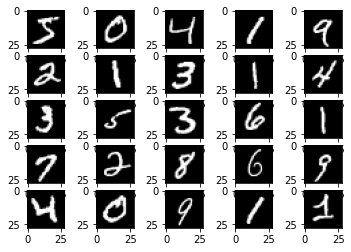

In [48]:
# example of loading and plotting the mnist dataset
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot

# load dataset
(trainX, trainy), (testX, testy) = load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# plot first few images
for i in range(25):
    # define subplot
    pyplot.subplot(5, 5, i+1) 
    # plot raw pixel data 
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))

    
# show the figure
pyplot.show()

In [50]:
#importing libraries
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

# load dataset
(x_train, y_train), (x_test, y_test) = load_data()

# reshape data to have a single channel: Vectorization: [rows, columns, channels];
#where channels represent the color channels of the image data.
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

# determine the shape of the input images
in_shape = x_train.shape[1:]

# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)

# normalize pixel values
#a good idea to scale the pixel values from the default range of 0-255 to 0-1 when training a CNN.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# define loss and optimizer
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)

# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print('Accuracy: %.3f' % acc)

# make a prediction
image = x_train[5]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

(28, 28, 1) 10
313/313 - 1s - loss: 0.0458 - accuracy: 0.9857
Accuracy: 0.986
Predicted: class=2


# RNN


Recurrent Neural Networks            
Designed to operate upon sequences of data.             
Very effective for natural language processing problems, time series forecasting and speech recognition.                        
The most popular type of RNN is the Long Short-Term Memory network, or LSTM for short. LSTMs can be used in a model to accept a sequence of input data and make a prediction, such as assign a class label or predict a numerical value like the next value or values in the sequence.

We will use : Monthly car sales in Quebec (1960-1968) Dataset

Source: Time Series Data Library (citing: Abraham & Ledolter (1983))

In [1]:
# lstm for time series forecasting
from numpy import sqrt
from numpy import asarray
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return asarray(X), asarray(y)

# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0, index_col=0, squeeze=True)


# retrieve the values
values = df.values.astype('float32')


# specify the window size
n_steps = 5

# split into samples
X, y = split_sequence(values, n_steps)

# reshape into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# split into train/test
n_test = 12
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

# compile the model
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

# fit the model
model.fit(X_train, y_train, epochs=350, batch_size=32, verbose=2, validation_data=(X_test, y_test))

# evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=2)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))

# make a prediction
row = asarray([18024.0, 16722.0, 14385.0, 21342.0, 17180.0]).reshape((1, n_steps, 1))
yhat = model.predict(row)
print('Predicted: %.3f' % (yhat))

(91, 5, 1) (12, 5, 1) (91,) (12,)
Epoch 1/350
3/3 - 2s - loss: 1828820224.0000 - mae: 41084.0273 - val_loss: 1317611776.0000 - val_mae: 35799.0039
Epoch 2/350
3/3 - 0s - loss: 549706432.0000 - mae: 21858.1074 - val_loss: 190334528.0000 - val_mae: 13216.3525
Epoch 3/350
3/3 - 0s - loss: 75880312.0000 - mae: 7233.6655 - val_loss: 72553912.0000 - val_mae: 7026.2266
Epoch 4/350
3/3 - 0s - loss: 112743648.0000 - mae: 8663.2676 - val_loss: 271208032.0000 - val_mae: 15250.2822
Epoch 5/350
3/3 - 0s - loss: 200480480.0000 - mae: 12801.1143 - val_loss: 258089776.0000 - val_mae: 15109.5049
Epoch 6/350
3/3 - 0s - loss: 157399024.0000 - mae: 11193.8711 - val_loss: 130417376.0000 - val_mae: 10450.0029
Epoch 7/350
3/3 - 0s - loss: 75968784.0000 - mae: 7251.9463 - val_loss: 43883296.0000 - val_mae: 5995.1929
Epoch 8/350
3/3 - 0s - loss: 25329326.0000 - mae: 4040.7717 - val_loss: 16972698.0000 - val_mae: 2927.9597
Epoch 9/350
3/3 - 0s - loss: 16337806.0000 - mae: 3115.8203 - val_loss: 32602726.0000 - v